In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
df = pickle.load(open('Latrocinio.pickle', 'rb'))

In [3]:
pd.set_option('display.max_columns', 999)  ### para o pandas mostrar mais colunas.

In [4]:
df.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2010,82,82/2010,2010-01-05 20:56:15,2010-01-06 02:17:32,2010-01-05,A NOITE,2010-01-05,2010-01-05 20:56:15,Desconhecida,Não,NaN,R DR JOAO VIEIRA NEVES,280.0,JD ESMERALDA,S.PAULO,SP,NaN,NaN,Via pública,IC-IML,BO PARA INVESTIGAÇÃO,51º D.P. RIO PEQUENO,51º D.P. RIO PEQUENO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,§3o. Se da violência resulta morte:,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,2010,114,114/2010,2010-01-08 10:54:10,2010-01-08 12:47:09,2010-01-08,PELA MANHÃ,2010-01-08,2010-01-08 10:54:10,Desconhecida,Não,NaN,R COSMORAMA,55.0,JD PRUDENCIA,S.PAULO,SP,NaN,NaN,Via pública,IC-IML,BO PARA INQUÉRITO,43º D.P. CIDADE ADEMAR,43º D.P. CIDADE ADEMAR,Título I - Pessoa (arts. 121 a 154),Homicídio simples (art. 121),NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,2010,114,114/2010,2010-01-08 10:54:10,2010-01-08 12:47:09,2010-01-08,PELA MANHÃ,2010-01-08,2010-01-08 10:54:10,Desconhecida,Não,NaN,R COSMORAMA,55.0,JD PRUDENCIA,S.PAULO,SP,NaN,NaN,Via pública,IC-IML,BO PARA INQUÉRITO,43º D.P. CIDADE ADEMAR,43º D.P. CIDADE ADEMAR,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,§3o. Se da violência resulta morte:,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,2010,144,144/2010,2010-01-10 18:22:53,2010-01-10 18:26:18,2010-01-08,PELA MANHÃ,2010-01-10,2010-01-10 18:22:53,Desconhecida,Não,114/2010 - 10243,R COSMORAMA,55.0,JD PRUDENCIA,S.PAULO,SP,NaN,NaN,Via pública,NaN,BO PARA ADENDO,43º D.P. CIDADE ADEMAR,43º D.P. CIDADE ADEMAR,Título I - Pessoa (arts. 121 a 154),Homicídio simples (art. 121),NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,2010,144,144/2010,2010-01-10 18:22:53,2010-01-10 18:26:18,2010-01-08,PELA MANHÃ,2010-01-10,2010-01-10 18:22:53,Desconhecida,Não,114/2010 - 10243,R COSMORAMA,55.0,JD PRUDENCIA,S.PAULO,SP,NaN,NaN,Via pública,NaN,BO PARA ADENDO,43º D.P. CIDADE ADEMAR,43º D.P. CIDADE ADEMAR,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,§3o. Se da violência resulta morte:,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [5]:
df.shape

(5584, 56)

In [6]:
# Eliminando linhas duplicadas pelo número do BO.

In [7]:
df = df.sort_values(['NUMERO_BOLETIM', 'STATUS'], ascending=[True, True])

In [8]:
df.loc[df.NUMERO_BOLETIM == '476/2010']

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
19,2010,476,476/2010,2010-01-23 03:41:01,2010-01-23 05:43:40,2010-01-23,DE MADRUGADA,2010-01-23,2010-01-23 03:41:01,Conhecida,Não,NaN,R JOAO DE CASTILHO PINTO,55.0,ITAIM PAULISTA,S.PAULO,SP,NaN,NaN,Via pública,IC-IML,BO PARA INQUÉRITO,50º D.P. ITAIM PAULISTA,50º D.P. ITAIM PAULISTA,Título I - Pessoa (arts. 121 a 154),Homicídio simples (art. 121),NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
20,2010,476,476/2010,2010-01-23 03:41:01,2010-01-23 05:43:40,2010-01-23,DE MADRUGADA,2010-01-23,2010-01-23 03:41:01,Conhecida,Não,NaN,R JOAO DE CASTILHO PINTO,55.0,ITAIM PAULISTA,S.PAULO,SP,NaN,NaN,Via pública,IC-IML,BO PARA INQUÉRITO,50º D.P. ITAIM PAULISTA,50º D.P. ITAIM PAULISTA,Título XI - Administração pública (arts. 312 a...,Resistência (art. 329),NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
18,2010,476,476/2010,2010-01-23 03:41:01,2010-01-23 05:43:40,2010-01-23,DE MADRUGADA,2010-01-23,2010-01-23 03:41:01,Conhecida,Não,NaN,R JOAO DE CASTILHO PINTO,55.0,ITAIM PAULISTA,S.PAULO,SP,NaN,NaN,Via pública,IC-IML,BO PARA INQUÉRITO,50º D.P. ITAIM PAULISTA,50º D.P. ITAIM PAULISTA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,§3o. Se da violência resulta morte:,Tentado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [9]:
df = df.drop_duplicates(subset='NUMERO_BOLETIM', keep='first')

In [10]:
df.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2012,6,2012-06-01 00:00:00,2012-02-01 16:49:25,2012-02-01 18:09:26,2012-02-01,A TARDE,2012-02-01,2012-02-01 16:49:25,Conhecida,Não,NaN,RUA VOLUNTARIO ANTONIO DOS SANTOS,650.0,VILA BIANCHI,BRAGANCA PAULISTA,SP,-23.504132,-46.760706,Comércio e serviços,IC-IML,BO PARA INVESTIGAÇÃO,DEL.INV.GER. BRAGANÇA PAULISTA,03º D.P. BRAGANÇA PAULISTA,Título XI - Administração pública (arts. 312 a...,Resistência (art. 329),"§1o. Se o ato, em razão da resistência, não se...",Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
7,2014,6,2014-06-01 00:00:00,2014-02-07 10:50:27,2014-02-07 13:30:27,2014-02-07,PELA MANHÃ,2014-02-07,2014-02-07 10:50:27,Desconhecida,Não,NaN,AV LAURITA ORTEGA MARI,831.0,PQ.PINHEIROS,TABOAO DA SERRA,SP,-23.620073,-46.781230,Via pública,IC-IML,BO PARA INQUÉRITO,SETOR HOM.SEC. TABOÃO DA SERRA,01º D.P. TABOÃO DA SERRA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,§3o. Se da violência resulta morte:,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
0,2016,1,1/2016,2016-01-01 02:06:20,2016-01-01 05:11:05,2016-01-01,DE MADRUGADA,2016-01-01,2016-01-01 02:06:20,Desconhecida,Não,NaN,NaN,0.0,VILA GALVÃO,GUARULHOS,SP,NaN,NaN,Residência,IC-IML,APRECIAÇÃO DO DELEGADO TITULAR,02º D.P. GUARULHOS,02º D.P. GUARULHOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - RESIDENCIA,§3o. Se da violência resulta morte:,Consumado,FATIMA REGINA DA SILVA,Vítima,Sim,1.69407e+07,SP,S.PAULO -SP,BRASILEIRA,Feminino,1965-09-03 00:00:00,50.0,Divorciado,ADMINISTRADOR FINANCEIRO,Superior completo,Branca,Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,2017,1,1/2017,2017-01-02 10:31:55,2017-01-02 16:36:56,2017-01-02,PELA MANHÃ,2017-01-02,2017-01-02 10:31:55,Desconhecida,Não,NaN,NaN,0.0,VILA RECREIO  2ª SECCAO,OURINHOS,SP,NaN,NaN,Residência,IC-IML,APRECIAÇÃO DO DELEGADO TITULAR,DEL.INV.GER. OURINHOS,02º D.P. OURINHOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - RESIDENCIA,§3o. Se da violência resulta morte:,Consumado,CELSO SILVA DE MEDEIROS,Vítima,Sim,8.75954e+06,SP,TEJUPA -SP,BRASILEIRA,Masculino,1936-09-20 00:00:00,80.0,Viuvo,APOSENTADO(A),2 Grau completo,Branca,Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
30,2016,10,10/2016,2016-01-22 11:54:59,2016-01-22 12:03:33,2015-12-20,A TARDE,2016-01-22,2016-01-22 11:54:59,Desconhecida,Não,7381/2015 - 10333,NaN,0.0,PIRITUBA,S.PAULO,SP,NaN,NaN,Residência,NaN,BO PARA ADENDO,DEIC-1ª DELEGACIA DA DISCCPAT,87º D.P. V. P. BARRETO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - RESIDENCIA,§3o. Se da violência resulta morte:,Consumado,EDUARDO HENRIQUE DE MORAES VITIMA FATAL,Vítima,Sim,2.85916e+07,SP,SÃO PAULO/SP,NaN,Masculino,1979-07-15 00:00:00,36.0,Casado,TECNICO(A),NaN,Branca,Roubo (art. 157),Vítima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [11]:
df.shape

(2804, 56)

In [12]:
# Análise Exploratória

In [13]:
features = df.columns.tolist()[0:]

In [14]:
for i in features:
    print (i + '    :    ' + str(sum(df[i].isnull())))

ANO_BO    :    0
NUM_BO    :    0
NUMERO_BOLETIM    :    0
BO_INICIADO    :    0
BO_EMITIDO    :    0
DATAOCORRENCIA    :    0
PERIDOOCORRENCIA    :    0
DATACOMUNICACAO    :    0
DATAELABORACAO    :    0
BO_AUTORIA    :    0
FLAGRANTE    :    0
NUMERO_BOLETIM_PRINCIPAL    :    1983
LOGRADOURO    :    625
NUMERO    :    7
BAIRRO    :    184
CIDADE    :    7
UF    :    7
LATITUDE    :    846
LONGITUDE    :    846
DESCRICAOLOCAL    :    0
EXAME    :    520
SOLUCAO    :    1
DELEGACIA_NOME    :    0
DELEGACIA_CIRCUNSCRICAO    :    0
ESPECIE    :    0
RUBRICA    :    0
DESDOBRAMENTO    :    336
STATUS    :    0
NOMEPESSOA    :    1233
TIPOPESSOA    :    1233
VITIMAFATAL    :    1233
RG    :    1310
RG_UF    :    1310
NATURALIDADE    :    1298
NACIONALIDADE    :    1474
SEXO    :    1268
DATANASCIMENTO    :    1270
IDADE    :    1266
ESTADOCIVIL    :    1400
PROFISSAO    :    1546
GRAUINSTRUCAO    :    1681
CORCUTIS    :    1233
NATUREZAVINCULADA    :    1233
TIPOVINCULO    :    1233
RELACI

In [15]:
# Verificando campos similiares

In [16]:
# DELEGACIA_NOME refere-se à delegacia onde foi feito o registro da ocorrência. 
# DELEGACIA_CIRUNSCRICAO refere-se à delegacia da circunscrição onde o crime ocorreu. Foi escolhido esse campo.

In [17]:
df2 = df.groupby('DELEGACIA_NOME').DELEGACIA_NOME.count()

In [18]:
df3 = df.groupby('DELEGACIA_CIRCUNSCRICAO').DELEGACIA_CIRCUNSCRICAO.count()

In [19]:
df2.shape, df3.shape

((494,), (530,))

In [20]:
df2.head(n=20)

DELEGACIA_NOME
01º D.P. ARAÇATUBA              1
01º D.P. BARRETOS               1
01º D.P. BARUERI                1
01º D.P. BIRIGUI                3
01º D.P. BOTUCATU               1
01º D.P. CAIEIRAS               1
01º D.P. CAMPINAS              17
01º D.P. CARAGUATATUBA          1
01º D.P. CARAPICUIBA           20
01º D.P. CUBATÃO                1
01º D.P. DIADEMA               29
01º D.P. EMBU DAS ARTES         4
01º D.P. FERRAZ VASCONCELOS     1
01º D.P. GUARUJA                2
01º D.P. GUARULHOS             10
01º D.P. INDAIATUBA             1
01º D.P. ITU                    1
01º D.P. JACAREI                1
01º D.P. JALES                  1
01º D.P. JUNDIAI                1
Name: DELEGACIA_NOME, dtype: int64

In [21]:
df3.head(n=20)

DELEGACIA_CIRCUNSCRICAO
01º D.P. AMERICANA            2
01º D.P. AMPARO               1
01º D.P. ANDRADINA            2
01º D.P. ARARAQUARA           1
01º D.P. ARARAS               1
01º D.P. ARAÇATUBA            2
01º D.P. ATIBAIA              1
01º D.P. BARRETOS             2
01º D.P. BARUERI              5
01º D.P. BATATAIS             1
01º D.P. BAURU                2
01º D.P. BEBEDOURO            2
01º D.P. BIRIGUI              8
01º D.P. BOTUCATU             3
01º D.P. BRAGANÇA PAULISTA    1
01º D.P. CAIEIRAS             3
01º D.P. CAJAMAR              1
01º D.P. CAMPINAS             5
01º D.P. CAPÃO BONITO         1
01º D.P. CARAGUATATUBA        2
Name: DELEGACIA_CIRCUNSCRICAO, dtype: int64

In [22]:
df.groupby('DESDOBRAMENTO').DESDOBRAMENTO.count()

DESDOBRAMENTO
Contra autoridade ou agente descrito nos arts. 142 e 144 da Constituição Federal       1
Encontro de cadáver ou parte relevante deste                                           1
II - por motivo fútil                                                                  1
Lesão corporal decorrente de intervenção policial (RES. SSP 05 - 07/01/2013)           3
Morte decorrente de intervenção policial (RES. SSP 05 - 07/01/2013)                   15
Nas mesmas penas incorrem quem (Par. único)                                            5
Possuir, deter, portar, adquirir, fornecer, receber, ter em depósito...                3
caput. Subtrair coisa móvel alheia, mediante grave ameaça ou violência a pessoa       17
§1o. (...) logo depois de subtraída a coisa, emprega violência contra pessoa          12
§1o. Se o ato, em razão da resistência, não se executa                                 2
§3o. Se da violência resulta lesão corporal grave:                                    19
§3o. Se

In [23]:
# Eliminar as linhas de Status "Tentado" para ficarmos só com Latrocínio efetivo

In [24]:
df.groupby('STATUS').STATUS.count()

STATUS
Consumado    2800
Tentado         4
Name: STATUS, dtype: int64

In [25]:
df = df.loc[df.STATUS == 'Consumado']

In [26]:
df.groupby('STATUS').STATUS.count()

STATUS
Consumado    2800
Name: STATUS, dtype: int64

In [27]:
# Verificando categóricas

In [28]:
df.groupby('TIPOPESSOA').TIPOPESSOA.count()

TIPOPESSOA
Adolescente        1
Autor/Vitima      31
Indiciado          2
Vítima          1537
Name: TIPOPESSOA, dtype: int64

In [29]:
df.groupby('VITIMAFATAL').TIPOPESSOA.count()

VITIMAFATAL
Sim    1571
Name: TIPOPESSOA, dtype: int64

In [30]:
df.groupby('SEXO').SEXO.count()

SEXO
Feminino      167
Masculino    1369
Name: SEXO, dtype: int64

In [31]:
df.groupby('ESTADOCIVIL').ESTADOCIVIL.count()

ESTADOCIVIL
Casado           568
Convivente        54
Desquitado         7
Divorciado        71
Ignorado          41
Separado          22
Solteiro         589
União Estável     11
Viuvo             41
Name: ESTADOCIVIL, dtype: int64

In [32]:
df.groupby('PROFISSAO').PROFISSAO.count()

PROFISSAO
ACOUGUEIRO(A)                    2
ADMINISTRADOR DE EMPRESAS        1
ADMINISTRADOR FINANCEIRO         1
ADMINISTRADOR(A)                 2
ADVOGADO(A)                      5
AGENTE DE SEGURANCA              6
AGENTE PENITENCIARIO             5
AGRICULTOR(A)                    9
AGROPECUARISTA                   2
AJUDANTE                        23
AJUDANTE DE COZINHA              1
AJUDANTE DE ELETRICISTA          1
AJUDANTE DE MOTORISTA            5
AJUDANTE DE PEDREIRO             3
AJUDANTE DE SERRALHEIRO          1
AJUDANTE GERAL                  11
ANALISTA                         4
ANALISTA DE SISTEMAS            10
APOSENTADO(A)                  128
ARQUITETO(A)                     3
ASSESSOR DE GABINETE             2
ASSISTENTE ADMINISTRATIVO        1
ASSISTENTE JUDICIARIO            1
ASSISTENTE SOCIAL                1
ATENDENTE                        5
AUDITOR(A)                       1
AUTONOMO(A)                     33
AUXILIAR ADMINISTRATIVO          5
AUXILIAR D

In [33]:
df.groupby('GRAUINSTRUCAO').GRAUINSTRUCAO.count()

GRAUINSTRUCAO
1 Grau completo        420
1 Grau incompleto       41
2 Grau completo        436
2 Grau incompleto       22
Analfabeto              17
Superior completo      168
Superior incompleto     19
Name: GRAUINSTRUCAO, dtype: int64

In [34]:
df.groupby('CORCUTIS').CORCUTIS.count()

CORCUTIS
Amarela            28
Branca           1065
Não informada       3
Outros             20
Parda             398
Preta              56
Vermelha            1
Name: CORCUTIS, dtype: int64

In [35]:
df.groupby('NATUREZAVINCULADA').NATUREZAVINCULADA.count()

NATUREZAVINCULADA
A.I.-Homicídio qualificado (art. 121, §2o.)                           1
A.I.-Roubo (art. 157)                                                37
Apreensão de Adolescente                                              1
Associação Criminosa (art. 288)                                       1
Choque                                                                2
Comunicação de óbito                                                  6
Destruição, subtração ou ocultação de cadáver (art. 211)              1
Disparo de arma de fogo (Art. 15)                                     1
Drogas sem autorização ou em desacordo (Art.33, caput)                1
Encontro de Pessoa                                                    1
Explosão (art. 251)                                                   1
Furto (art. 155)                                                      1
Homicídio qualificado (art. 121, §2o.)                                6
Homicídio simples (art. 121)                  

In [36]:
df.groupby('TIPOVINCULO').TIPOVINCULO.count()

TIPOVINCULO
Adolescente        1
Autor             13
Autor/Vitima      14
Autor/Vítima       6
Indiciado          2
Vítima          1535
Name: TIPOVINCULO, dtype: int64

In [37]:
df.groupby('RELACIONAMENTO').RELACIONAMENTO.count()

RELACIONAMENTO
CONHECIDO,CONHECIDO    1
NENHUMA RELACAO        1
VIZINHANCA             1
Name: RELACIONAMENTO, dtype: int64

In [38]:
df.groupby('ANO_FABRICACAO').ANO_FABRICACAO.count()

ANO_FABRICACAO
0.0       2196
1975.0       1
1983.0       2
1986.0       2
1988.0       1
1989.0       1
1990.0       1
1991.0       2
1992.0       2
1993.0       2
1994.0       3
1995.0       2
1996.0       6
1997.0       8
1998.0       3
1999.0       6
2000.0       4
2001.0       9
2002.0      15
2003.0      19
2004.0      20
2005.0      25
2006.0      30
2007.0      37
2008.0      48
2009.0      53
2010.0      55
2011.0      73
2012.0      46
2013.0      38
2014.0      35
2015.0      13
2016.0      13
2017.0       6
2018.0       2
Name: ANO_FABRICACAO, dtype: int64

In [39]:
features = df.columns.tolist()[0:]

In [40]:
for i in features:
    print (i + '    :    ' + str(sum(df[i].isnull())))

ANO_BO    :    0
NUM_BO    :    0
NUMERO_BOLETIM    :    0
BO_INICIADO    :    0
BO_EMITIDO    :    0
DATAOCORRENCIA    :    0
PERIDOOCORRENCIA    :    0
DATACOMUNICACAO    :    0
DATAELABORACAO    :    0
BO_AUTORIA    :    0
FLAGRANTE    :    0
NUMERO_BOLETIM_PRINCIPAL    :    1979
LOGRADOURO    :    625
NUMERO    :    7
BAIRRO    :    184
CIDADE    :    7
UF    :    7
LATITUDE    :    845
LONGITUDE    :    845
DESCRICAOLOCAL    :    0
EXAME    :    519
SOLUCAO    :    1
DELEGACIA_NOME    :    0
DELEGACIA_CIRCUNSCRICAO    :    0
ESPECIE    :    0
RUBRICA    :    0
DESDOBRAMENTO    :    336
STATUS    :    0
NOMEPESSOA    :    1229
TIPOPESSOA    :    1229
VITIMAFATAL    :    1229
RG    :    1306
RG_UF    :    1306
NATURALIDADE    :    1294
NACIONALIDADE    :    1470
SEXO    :    1264
DATANASCIMENTO    :    1266
IDADE    :    1262
ESTADOCIVIL    :    1396
PROFISSAO    :    1542
GRAUINSTRUCAO    :    1677
CORCUTIS    :    1229
NATUREZAVINCULADA    :    1229
TIPOVINCULO    :    1229
RELACI

In [41]:
df.groupby('DESCR_TIPO_VEICULO').DESCR_TIPO_VEICULO.count()

DESCR_TIPO_VEICULO
AUTOMOVEL       254
CAMINHONETE      39
CAMINHÃO          5
CAMIONETA        23
MICRO-ONIBUS      1
MOTOCICLO       256
MOTONETA          5
SEMI-REBOQUE      3
UTILITÁRIO        5
Name: DESCR_TIPO_VEICULO, dtype: int64

In [42]:
# Drop das colunas com 100% de Missing, de Ids, repetitivas, de texto ou sem relevância para o modelo.

In [43]:
(df.drop(['NUM_BO', 'NUMERO_BOLETIM', 'BO_EMITIDO','BO_INICIADO', 'BO_INICIADO', 'DATACOMUNICACAO', 'DATAELABORACAO', 
'LOGRADOURO', 'NUMERO', 'UF', 'LATITUDE', 'LONGITUDE', 'DELEGACIA_NOME', 'ESPECIE', 'DESDOBRAMENTO', 'STATUS', 'NOMEPESSOA', 
'RG', 'RG_UF', 'NATURALIDADE', 'NACIONALIDADE', 'DATANASCIMENTO', 'NATUREZAVINCULADA', 'RELACIONAMENTO', 'PARENTESCO', 
'PLACA_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'], axis=1, inplace=True))

In [44]:
# Drop temporaria destas colunas. Devem voltar para o modelo na 2a entrega.

In [45]:
(df.drop(['NUMERO_BOLETIM_PRINCIPAL', 'EXAME', 'SOLUCAO', 'PROFISSAO', 'TIPOVINCULO', 'UF_VEICULO', 'CIDADE_VEICULO', 
'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO', 'ANO_MODELO'], axis=1, inplace=True))

In [46]:
features = df.columns.tolist()[0:]

In [47]:
for i in features:
    print (i + '    :    ' + str(sum(df[i].isnull())))

ANO_BO    :    0
DATAOCORRENCIA    :    0
PERIDOOCORRENCIA    :    0
BO_AUTORIA    :    0
FLAGRANTE    :    0
BAIRRO    :    184
CIDADE    :    7
DESCRICAOLOCAL    :    0
DELEGACIA_CIRCUNSCRICAO    :    0
RUBRICA    :    0
TIPOPESSOA    :    1229
VITIMAFATAL    :    1229
SEXO    :    1264
IDADE    :    1262
ESTADOCIVIL    :    1396
GRAUINSTRUCAO    :    1677
CORCUTIS    :    1229
DESCR_TIPO_VEICULO    :    2209


In [48]:
df.shape

(2800, 18)

In [49]:
df.head()

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,BAIRRO,CIDADE,DESCRICAOLOCAL,DELEGACIA_CIRCUNSCRICAO,RUBRICA,TIPOPESSOA,VITIMAFATAL,SEXO,IDADE,ESTADOCIVIL,GRAUINSTRUCAO,CORCUTIS,DESCR_TIPO_VEICULO
0,2012,2012-02-01,A TARDE,Conhecida,Não,VILA BIANCHI,BRAGANCA PAULISTA,Comércio e serviços,03º D.P. BRAGANÇA PAULISTA,Resistência (art. 329),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,2014-02-07,PELA MANHÃ,Desconhecida,Não,PQ.PINHEIROS,TABOAO DA SERRA,Via pública,01º D.P. TABOÃO DA SERRA,Roubo (art. 157) - TRANSEUNTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2016,2016-01-01,DE MADRUGADA,Desconhecida,Não,VILA GALVÃO,GUARULHOS,Residência,02º D.P. GUARULHOS,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Feminino,50.0,Divorciado,Superior completo,Branca,NaN
4,2017,2017-01-02,PELA MANHÃ,Desconhecida,Não,VILA RECREIO  2ª SECCAO,OURINHOS,Residência,02º D.P. OURINHOS,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Masculino,80.0,Viuvo,2 Grau completo,Branca,NaN
30,2016,2015-12-20,A TARDE,Desconhecida,Não,PIRITUBA,S.PAULO,Residência,87º D.P. V. P. BARRETO,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Masculino,36.0,Casado,NaN,Branca,NaN


In [50]:
df.groupby('BO_AUTORIA').BO_AUTORIA.count()

BO_AUTORIA
Conhecida        596
Desconhecida    2171
Ignorado          33
Name: BO_AUTORIA, dtype: int64

In [51]:
df['Ano_Ocorrencia'] = pd.DatetimeIndex(df['DATAOCORRENCIA']).year

In [52]:
df['Mes_Ocorrencia'] = pd.DatetimeIndex(df['DATAOCORRENCIA']).month

In [53]:
df[['Ano_Ocorrencia', 'Mes_Ocorrencia']].head()

,Ano_Ocorrencia,Mes_Ocorrencia
0,2012,2
7,2014,2
0,2016,1
4,2017,1
30,2015,12


In [54]:
df['Ano_Ocorrencia'] = df['Ano_Ocorrencia'].apply(str)

In [55]:
df['Mes_Ocorrencia'] = df['Mes_Ocorrencia'].apply(str)

In [56]:
df['Mes_Ocorrencia'] = df['Mes_Ocorrencia'].apply(lambda x: '{0:0>2}'.format(x))

In [57]:
df[['Ano_Ocorrencia', 'Mes_Ocorrencia']].head()

,Ano_Ocorrencia,Mes_Ocorrencia
0,2012,02
7,2014,02
0,2016,01
4,2017,01
30,2015,12


In [58]:
df.insert(loc=0, column='Ano_Mes_Ocorrencia', value=0)

In [59]:
df['Ano_Mes_Ocorrencia'] = df['Ano_Ocorrencia'] + df['Mes_Ocorrencia']

In [60]:
df['Ano_Mes_Ocorrencia'].head()

0     201202
7     201402
0     201601
4     201701
30    201512
Name: Ano_Mes_Ocorrencia, dtype: object

In [61]:
(df.drop(['ANO_BO', 'DATAOCORRENCIA', 'Ano_Ocorrencia', 'Mes_Ocorrencia'], axis=1, inplace=True))

In [62]:
df.head()

,Ano_Mes_Ocorrencia,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,BAIRRO,CIDADE,DESCRICAOLOCAL,DELEGACIA_CIRCUNSCRICAO,RUBRICA,TIPOPESSOA,VITIMAFATAL,SEXO,IDADE,ESTADOCIVIL,GRAUINSTRUCAO,CORCUTIS,DESCR_TIPO_VEICULO
0,201202,A TARDE,Conhecida,Não,VILA BIANCHI,BRAGANCA PAULISTA,Comércio e serviços,03º D.P. BRAGANÇA PAULISTA,Resistência (art. 329),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,201402,PELA MANHÃ,Desconhecida,Não,PQ.PINHEIROS,TABOAO DA SERRA,Via pública,01º D.P. TABOÃO DA SERRA,Roubo (art. 157) - TRANSEUNTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,201601,DE MADRUGADA,Desconhecida,Não,VILA GALVÃO,GUARULHOS,Residência,02º D.P. GUARULHOS,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Feminino,50.0,Divorciado,Superior completo,Branca,NaN
4,201701,PELA MANHÃ,Desconhecida,Não,VILA RECREIO  2ª SECCAO,OURINHOS,Residência,02º D.P. OURINHOS,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Masculino,80.0,Viuvo,2 Grau completo,Branca,NaN
30,201512,A TARDE,Desconhecida,Não,PIRITUBA,S.PAULO,Residência,87º D.P. V. P. BARRETO,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Masculino,36.0,Casado,NaN,Branca,NaN


In [63]:
df_total_Ano_Mes_Ocorrencia = df.groupby(['Ano_Mes_Ocorrencia']).agg({'Ano_Mes_Ocorrencia': ['count']})
df_total_Ano_Mes_Ocorrencia.columns = ['Latrocinio_Ano_Mes']
df_total_Ano_Mes_Ocorrencia = df_total_Ano_Mes_Ocorrencia.reset_index()

In [64]:
df_total_Ano_Mes_Ocorrencia.head()

,Ano_Mes_Ocorrencia,Latrocinio_Ano_Mes
0,200608,1
1,200810,1
2,200903,1
3,200906,1
4,201001,16


In [65]:
# DF TO EXCEL
from pandas import ExcelWriter

writer = ExcelWriter('Latrocinio Ano Mes.xlsx')
df_total_Ano_Mes_Ocorrencia.to_excel(writer,'Sheet1')
writer.save()

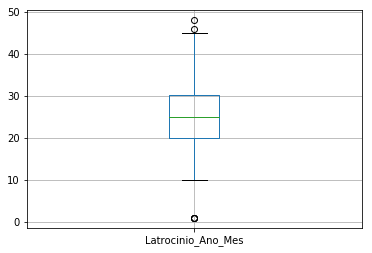

In [66]:
df_total_Ano_Mes_Ocorrencia.boxplot(column=['Latrocinio_Ano_Mes'])

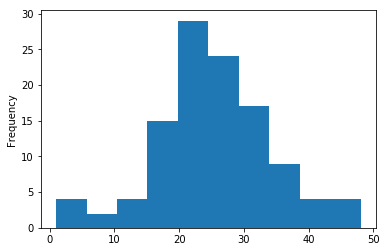

In [67]:
df_total_Ano_Mes_Ocorrencia.Latrocinio_Ano_Mes.plot.hist()

In [68]:
df.head()

,Ano_Mes_Ocorrencia,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,BAIRRO,CIDADE,DESCRICAOLOCAL,DELEGACIA_CIRCUNSCRICAO,RUBRICA,TIPOPESSOA,VITIMAFATAL,SEXO,IDADE,ESTADOCIVIL,GRAUINSTRUCAO,CORCUTIS,DESCR_TIPO_VEICULO
0,201202,A TARDE,Conhecida,Não,VILA BIANCHI,BRAGANCA PAULISTA,Comércio e serviços,03º D.P. BRAGANÇA PAULISTA,Resistência (art. 329),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,201402,PELA MANHÃ,Desconhecida,Não,PQ.PINHEIROS,TABOAO DA SERRA,Via pública,01º D.P. TABOÃO DA SERRA,Roubo (art. 157) - TRANSEUNTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,201601,DE MADRUGADA,Desconhecida,Não,VILA GALVÃO,GUARULHOS,Residência,02º D.P. GUARULHOS,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Feminino,50.0,Divorciado,Superior completo,Branca,NaN
4,201701,PELA MANHÃ,Desconhecida,Não,VILA RECREIO  2ª SECCAO,OURINHOS,Residência,02º D.P. OURINHOS,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Masculino,80.0,Viuvo,2 Grau completo,Branca,NaN
30,201512,A TARDE,Desconhecida,Não,PIRITUBA,S.PAULO,Residência,87º D.P. V. P. BARRETO,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Masculino,36.0,Casado,NaN,Branca,NaN


In [69]:
# Dados para tabelas de frequencia

In [70]:
df[['BAIRRO']].groupby(['BAIRRO']).count()

""
BAIRRO
200 METROS DO DISTRITO INDUSTRIAL
3 DIVISÃO
A.E.CARVALHO
ACARAÚ
ACLIMAÇÃO
AEROPORTO
AGUA BRANCA
AGUA FRIA
AGUA GRANDE


In [71]:
features = df.columns.tolist()[0:]

In [72]:
for i in features:
    print (i + '    :    ' + str(sum(df[i].isnull())))

Ano_Mes_Ocorrencia    :    0
PERIDOOCORRENCIA    :    0
BO_AUTORIA    :    0
FLAGRANTE    :    0
BAIRRO    :    184
CIDADE    :    7
DESCRICAOLOCAL    :    0
DELEGACIA_CIRCUNSCRICAO    :    0
RUBRICA    :    0
TIPOPESSOA    :    1229
VITIMAFATAL    :    1229
SEXO    :    1264
IDADE    :    1262
ESTADOCIVIL    :    1396
GRAUINSTRUCAO    :    1677
CORCUTIS    :    1229
DESCR_TIPO_VEICULO    :    2209


In [73]:
df.groupby('GRAUINSTRUCAO').GRAUINSTRUCAO.count()

GRAUINSTRUCAO
1 Grau completo        420
1 Grau incompleto       41
2 Grau completo        436
2 Grau incompleto       22
Analfabeto              17
Superior completo      168
Superior incompleto     19
Name: GRAUINSTRUCAO, dtype: int64

In [74]:
df.groupby('CORCUTIS').CORCUTIS.count()

CORCUTIS
Amarela            28
Branca           1065
Não informada       3
Outros             20
Parda             398
Preta              56
Vermelha            1
Name: CORCUTIS, dtype: int64

In [75]:
df.loc[df['BAIRRO'].isnull(), 'BAIRRO'] = 'BairroNaoInformado'

In [76]:
df.loc[df['CIDADE'].isnull(), 'CIDADE'] = 'CidadeNaoInformada'

In [77]:
df.loc[df['TIPOPESSOA'].isnull(), 'TIPOPESSOA'] = 'TipoPessoaNaoIdentificada'

In [78]:
df.loc[df['SEXO'].isnull(), 'SEXO'] = 'SexoNaoInformado'

In [79]:
df.loc[df['ESTADOCIVIL'].isnull(), 'ESTADOCIVIL'] = 'EstadoCivilNaoInformado'

In [80]:
df.loc[df['GRAUINSTRUCAO'].isnull(), 'GRAUINSTRUCAO'] = 'GrauIstrucaoNaoInformado'

In [81]:
df.loc[df['CORCUTIS'].isnull(), 'CORCUTIS'] = 'CorCutisNaoInformada'

In [82]:
df.loc[df['DESCR_TIPO_VEICULO'].isnull(), 'DESCR_TIPO_VEICULO'] = 'VeiculoNao'

In [83]:
df.head()

,Ano_Mes_Ocorrencia,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,BAIRRO,CIDADE,DESCRICAOLOCAL,DELEGACIA_CIRCUNSCRICAO,RUBRICA,TIPOPESSOA,VITIMAFATAL,SEXO,IDADE,ESTADOCIVIL,GRAUINSTRUCAO,CORCUTIS,DESCR_TIPO_VEICULO
0,201202,A TARDE,Conhecida,Não,VILA BIANCHI,BRAGANCA PAULISTA,Comércio e serviços,03º D.P. BRAGANÇA PAULISTA,Resistência (art. 329),TipoPessoaNaoIdentificada,NaN,SexoNaoInformado,NaN,EstadoCivilNaoInformado,GrauIstrucaoNaoInformado,CorCutisNaoInformada,VeiculoNao
7,201402,PELA MANHÃ,Desconhecida,Não,PQ.PINHEIROS,TABOAO DA SERRA,Via pública,01º D.P. TABOÃO DA SERRA,Roubo (art. 157) - TRANSEUNTE,TipoPessoaNaoIdentificada,NaN,SexoNaoInformado,NaN,EstadoCivilNaoInformado,GrauIstrucaoNaoInformado,CorCutisNaoInformada,VeiculoNao
0,201601,DE MADRUGADA,Desconhecida,Não,VILA GALVÃO,GUARULHOS,Residência,02º D.P. GUARULHOS,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Feminino,50.0,Divorciado,Superior completo,Branca,VeiculoNao
4,201701,PELA MANHÃ,Desconhecida,Não,VILA RECREIO  2ª SECCAO,OURINHOS,Residência,02º D.P. OURINHOS,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Masculino,80.0,Viuvo,2 Grau completo,Branca,VeiculoNao
30,201512,A TARDE,Desconhecida,Não,PIRITUBA,S.PAULO,Residência,87º D.P. V. P. BARRETO,Roubo (art. 157) - RESIDENCIA,Vítima,Sim,Masculino,36.0,Casado,GrauIstrucaoNaoInformado,Branca,VeiculoNao


In [84]:
df.groupby('DESCR_TIPO_VEICULO').DESCR_TIPO_VEICULO.count()

DESCR_TIPO_VEICULO
AUTOMOVEL        254
CAMINHONETE       39
CAMINHÃO           5
CAMIONETA         23
MICRO-ONIBUS       1
MOTOCICLO        256
MOTONETA           5
SEMI-REBOQUE       3
UTILITÁRIO         5
VeiculoNao      2209
Name: DESCR_TIPO_VEICULO, dtype: int64

In [85]:
df.groupby('GRAUINSTRUCAO').GRAUINSTRUCAO.count()

GRAUINSTRUCAO
1 Grau completo              420
1 Grau incompleto             41
2 Grau completo              436
2 Grau incompleto             22
Analfabeto                    17
GrauIstrucaoNaoInformado    1677
Superior completo            168
Superior incompleto           19
Name: GRAUINSTRUCAO, dtype: int64

In [86]:
df.groupby('CORCUTIS').CORCUTIS.count()

CORCUTIS
Amarela                   28
Branca                  1065
CorCutisNaoInformada    1229
Não informada              3
Outros                    20
Parda                    398
Preta                     56
Vermelha                   1
Name: CORCUTIS, dtype: int64

In [87]:
df['VITIMAFATAL'] = df['VITIMAFATAL'].apply(lambda x: 1 if x == 'Sim' else 0)   

In [88]:
df.head()

,Ano_Mes_Ocorrencia,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,BAIRRO,CIDADE,DESCRICAOLOCAL,DELEGACIA_CIRCUNSCRICAO,RUBRICA,TIPOPESSOA,VITIMAFATAL,SEXO,IDADE,ESTADOCIVIL,GRAUINSTRUCAO,CORCUTIS,DESCR_TIPO_VEICULO
0,201202,A TARDE,Conhecida,Não,VILA BIANCHI,BRAGANCA PAULISTA,Comércio e serviços,03º D.P. BRAGANÇA PAULISTA,Resistência (art. 329),TipoPessoaNaoIdentificada,0,SexoNaoInformado,NaN,EstadoCivilNaoInformado,GrauIstrucaoNaoInformado,CorCutisNaoInformada,VeiculoNao
7,201402,PELA MANHÃ,Desconhecida,Não,PQ.PINHEIROS,TABOAO DA SERRA,Via pública,01º D.P. TABOÃO DA SERRA,Roubo (art. 157) - TRANSEUNTE,TipoPessoaNaoIdentificada,0,SexoNaoInformado,NaN,EstadoCivilNaoInformado,GrauIstrucaoNaoInformado,CorCutisNaoInformada,VeiculoNao
0,201601,DE MADRUGADA,Desconhecida,Não,VILA GALVÃO,GUARULHOS,Residência,02º D.P. GUARULHOS,Roubo (art. 157) - RESIDENCIA,Vítima,1,Feminino,50.0,Divorciado,Superior completo,Branca,VeiculoNao
4,201701,PELA MANHÃ,Desconhecida,Não,VILA RECREIO  2ª SECCAO,OURINHOS,Residência,02º D.P. OURINHOS,Roubo (art. 157) - RESIDENCIA,Vítima,1,Masculino,80.0,Viuvo,2 Grau completo,Branca,VeiculoNao
30,201512,A TARDE,Desconhecida,Não,PIRITUBA,S.PAULO,Residência,87º D.P. V. P. BARRETO,Roubo (art. 157) - RESIDENCIA,Vítima,1,Masculino,36.0,Casado,GrauIstrucaoNaoInformado,Branca,VeiculoNao


In [89]:
features = df.columns.tolist()[0:]

In [90]:
for i in features:
    print (i + '    :    ' + str(sum(df[i].isnull())))

Ano_Mes_Ocorrencia    :    0
PERIDOOCORRENCIA    :    0
BO_AUTORIA    :    0
FLAGRANTE    :    0
BAIRRO    :    0
CIDADE    :    0
DESCRICAOLOCAL    :    0
DELEGACIA_CIRCUNSCRICAO    :    0
RUBRICA    :    0
TIPOPESSOA    :    0
VITIMAFATAL    :    0
SEXO    :    0
IDADE    :    1262
ESTADOCIVIL    :    0
GRAUINSTRUCAO    :    0
CORCUTIS    :    0
DESCR_TIPO_VEICULO    :    0


In [92]:
df_aux = pd.get_dummies(df['PERIDOOCORRENCIA'])
df = pd.concat([df, df_aux], axis=1)

In [95]:
(df.drop(['PERIDOOCORRENCIA'], axis=1, inplace=True))

In [96]:
df_aux = pd.get_dummies(df['BO_AUTORIA'])
df = pd.concat([df, df_aux], axis=1)

In [97]:
(df.drop(['BO_AUTORIA'], axis=1, inplace=True))

In [98]:
df['FLAGRANTE'] = df['FLAGRANTE'].apply(lambda x: 1 if x == 'Sim' else 0)

In [99]:
df.groupby('FLAGRANTE').FLAGRANTE.count()

FLAGRANTE
0    2519
1     281
Name: FLAGRANTE, dtype: int64

In [ ]:
# Voltar com esses campos depois

In [101]:
(df.drop(['BAIRRO', 'DELEGACIA_CIRCUNSCRICAO', 'RUBRICA'], axis=1, inplace=True))

In [102]:
df_aux = pd.get_dummies(df['CIDADE'])
df = pd.concat([df, df_aux], axis=1)

In [103]:
(df.drop(['CIDADE'], axis=1, inplace=True))

In [104]:
df_aux = pd.get_dummies(df['DESCRICAOLOCAL'])
df = pd.concat([df, df_aux], axis=1)

In [105]:
(df.drop(['DESCRICAOLOCAL'], axis=1, inplace=True))

In [106]:
df_aux = pd.get_dummies(df['TIPOPESSOA'])
df = pd.concat([df, df_aux], axis=1)

In [107]:
(df.drop(['TIPOPESSOA'], axis=1, inplace=True))

In [108]:
df_aux = pd.get_dummies(df['SEXO'])
df = pd.concat([df, df_aux], axis=1)

In [109]:
(df.drop(['SEXO'], axis=1, inplace=True))

In [111]:
(df.drop(['ESTADOCIVIL'], axis=1, inplace=True))

In [115]:
df_aux = pd.get_dummies(df['GRAUINSTRUCAO'])
df = pd.concat([df, df_aux], axis=1)

In [116]:
(df.drop(['GRAUINSTRUCAO'], axis=1, inplace=True))

In [117]:
df_aux = pd.get_dummies(df['CORCUTIS'])
df = pd.concat([df, df_aux], axis=1)

In [118]:
(df.drop(['CORCUTIS'], axis=1, inplace=True))

In [119]:
df_aux = pd.get_dummies(df['DESCR_TIPO_VEICULO'])
df = pd.concat([df, df_aux], axis=1)

In [120]:
(df.drop(['DESCR_TIPO_VEICULO'], axis=1, inplace=True))

In [122]:
df.head(n=5)

,Ano_Mes_Ocorrencia,FLAGRANTE,VITIMAFATAL,IDADE,A NOITE,A TARDE,DE MADRUGADA,EM HORA INCERTA,PELA MANHÃ,Conhecida,Desconhecida,Ignorado,AGUAI,AMERICANA,AMERICO BRASILIENSE,AMPARO,ANDRADINA,ANGATUBA,ANHEMBI,APARECIDA,ARACARIGUAMA,ARACATUBA,ARACOIABA DA SERRA,ARANDU,ARARAQUARA,ARARAS,AREALVA,AREIAS,ARTUR NOGUEIRA,ARUJA,ASSIS,ATIBAIA,AVANHANDAVA,BARIRI,BARRETOS,BARUERI,BATATAIS,BAURU,BEBEDOURO,BERTIOGA,BIRIGUI,BIRITIBA-MIRIM,BOA ESPERANCA DO SUL,BOCAINA,BOITUVA,BOTUCATU,BRAGANCA PAULISTA,CACAPAVA,CACHOEIRA PAULISTA,CAFELANDIA,CAIEIRAS,CAJAMAR,CAJATI,CAMPINAS,CAMPO LIMPO PAULISTA,CANANEIA,CAPAO BONITO,CAPELA DO ALTO,CAPIVARI,CARAGUATATUBA,CARAPICUIBA,CASA BRANCA,CASTILHO,CATANDUVA,CERQUILHO,CESARIO LANGE,CHAVANTES,COLOMBIA,COSMOPOLIS,COTIA,CRUZEIRO,CUBATAO,CUNHA,CidadeNaoInformada,DESCALVADO,DIADEMA,DIVINOLANDIA,DRACENA,EMBU,EMBU DAS ARTES,EMBU-GUACU,ESPIRITO STO. PINHAL,FERNANDO PRESTES,FERNANDOPOLIS,FERRAZ DE VASCONCELOS,FRANCA,FRANCISCO MORATO,FRANCO DA ROCHA,GENERAL SALGADO,GUAICARA,GUARANTA,GUARARAPES,GUARAREMA,GUARATINGUETA,GUAREI,GUARIBA,GUARUJA,GUARULHOS,HOLAMBRA,HORTOLANDIA,IACRI,IBATE,IBITINGA,IBIUNA,IGARACU DO TIETE,IGARATA,IGUAPE,ILHABELA,INDAIATUBA,IPERO,IPEUNA,ITANHAEM,ITAPECERICA DA SERRA,ITAPETININGA,ITAPEVA,ITAPEVI,ITAPOLIS,ITAQUAQUECETUBA,ITARIRI,ITATIBA,ITU,ITUPEVA,JABOTICABAL,JACAREI,JACUPIRANGA,JALES,JANDIRA,JARDINOPOLIS,JAU,JOANOPOLIS,JUNDIAI,JUNQUEIROPOLIS,JUQUIA,JUQUITIBA,LIMEIRA,LINS,LORENA,LOUVEIRA,MACATUBA,MAIRIPORA,MANDURI,MARILIA,MAUA,MIGUELOPOLIS,MINEIROS DO TIETE,MIRA ESTRELA,MIRACATU,MIRASSOL,MOGI DAS CRUZES,MOGI GUACU,MOGI MIRIM,MOGI-MIRIM,MONGAGUA,MONTE MOR,NAZARE PAULISTA,NOVA GRANADA,NOVA ODESSA,NOVO HORIZONTE,OLIMPIA,ORLANDIA,OSASCO,OURINHOS,PALMARES PAULISTA,PARAISO,PARIQUERA-ACU,PAULINIA,PEDERNEIRAS,PEDRA BELA,PEDREIRA,PENAPOLIS,PERUIBE,PIEDADE,PILAR DO SUL,PINDAMONHANGABA,PINDORAMA,PIQUETE,PIRACAIA,PIRACICABA,PIRAJU,PIRAPORA BOM JESUS,PIRAPOZINHO,PIRASSUNUNGA,POA,POLONI,POMPEIA,PONTAL,PORTO FELIZ,PORTO FERREIRA,POTIM,PRADOPOLIS,PRAIA GRANDE,PRESIDENTE PRUDENTE,PROMISSAO,REDENCAO DA SERRA,REGISTRO,RIBEIRAO BONITO,RIBEIRAO PIRES,RIBEIRAO PRETO,RINCAO,RINOPOLIS,RIO CLARO,RIO DAS PEDRAS,RIO GRANDE DA SERRA,S.ANDRE,S.BARBARA D OESTE,S.BENTO DO SAPUCAI,S.BERNARDO DO CAMPO,S.BRANCA,S.CAETANO DO SUL,S.CARLOS,S.FE DO SUL,S.ISABEL,S.JOAO DA BOA VISTA,S.JOSE DO RIO PRETO,S.JOSE DOS CAMPOS,S.LOURENCO DA SERRA,S.MIGUEL ARCANJO,S.PAULO,S.RITA PASSA QUATRO,S.ROQUE,S.SEBASTIAO,S.VICENTE,SALTINHO,SALTO,SALTO DE PIRAPORA,SANTANA DE PARNAIBA,SANTOS,SERRA AZUL,SERRANA,SERTAOZINHO,SOROCABA,SUMARE,SUZANO,TABAPUA,TABOAO DA SERRA,TANABI,TAQUARITINGA,TATUI,TAUBATE,TIETE,TRABIJU,TREMEMBE,TUPA,UBATUBA,URU,VARGEM GRANDE PAULISTA,VARZEA PAULISTA,VERA CRUZ,VINHEDO,VOTORANTIM,Area não ocupada,Carro Forte,Centro Comerc./Empresarial,Comércio e serviços,Condominio Comercial,Condominio Residencial,Entidade assistencial,Escritório,Estabelecimento bancário,Estabelecimento de ensino,Estabelecimento industrial,Hospedagem,Lazer e recreação,Local clandestino/ilegal,Repartição Pública,Residência,Restaurante e afins,Rodovia/Estrada,Saúde,Serviços e bens públicos,Shopping Center,Templo e afins,Terminal/Estação,Unidade rural,Via pública,Adolescente,Autor/Vitima,Indiciado,TipoPessoaNaoIdentificada,Vítima,Feminino,Masculino,SexoNaoInformado,Casado,Convivente,Desquitado,Divorciado,EstadoCivilNaoInformado,Ignorado,Separado,Solteiro,União Estável,Viuvo,1 Grau completo,1 Grau incompleto,2 Grau completo,2 Grau incompleto,Analfabeto,GrauIstrucaoNaoInformado,Superior completo,Superior incompleto,Amarela,Branca,CorCutisNaoInformada,Não informada,Outros,Parda,Preta,Vermelha,AUTOMOVEL,CAMINHONETE,CAMINHÃO,CAMIONETA,MICRO-ONIBUS,MOTOCICLO,MOTONETA,SEMI-REBOQUE,UTILITÁRIO,VeiculoNao
0,201202,0,0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [123]:
# DF TO EXCEL
from pandas import ExcelWriter

writer = ExcelWriter('Latrocinio Modelo.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [124]:
# DF TO Pickle  (in order to keep df format)

import pickle

outfile = open('Latrocinio Modelo.pickle','wb')
pickle.dump(df, outfile)
outfile.close()